In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('yacht')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_gated.train_model(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = .998)

0 tensor([0.3439], grad_fn=<SigmoidBackward>) tensor(0.9725, grad_fn=<MeanBackward0>) tensor(0.5242, grad_fn=<MeanBackward0>)
1 tensor([0.3143], grad_fn=<SigmoidBackward>) tensor(0.8573, grad_fn=<MeanBackward0>) tensor(0.4983, grad_fn=<MeanBackward0>)
2 tensor([0.2958], grad_fn=<SigmoidBackward>) tensor(0.7555, grad_fn=<MeanBackward0>) tensor(0.4794, grad_fn=<MeanBackward0>)
3 tensor([0.2823], grad_fn=<SigmoidBackward>) tensor(0.6564, grad_fn=<MeanBackward0>) tensor(0.4574, grad_fn=<MeanBackward0>)
4 tensor([0.2721], grad_fn=<SigmoidBackward>) tensor(0.5541, grad_fn=<MeanBackward0>) tensor(0.4359, grad_fn=<MeanBackward0>)
5 tensor([0.2640], grad_fn=<SigmoidBackward>) tensor(0.4477, grad_fn=<MeanBackward0>) tensor(0.4134, grad_fn=<MeanBackward0>)
6 tensor([0.2577], grad_fn=<SigmoidBackward>) tensor(0.3403, grad_fn=<MeanBackward0>) tensor(0.3916, grad_fn=<MeanBackward0>)
7 tensor([0.2525], grad_fn=<SigmoidBackward>) tensor(0.2329, grad_fn=<MeanBackward0>) tensor(0.3707, grad_fn=<MeanBack

72 tensor([0.1681], grad_fn=<SigmoidBackward>) tensor(-2.9078, grad_fn=<MeanBackward0>) tensor(0.0981, grad_fn=<MeanBackward0>)
73 tensor([0.1674], grad_fn=<SigmoidBackward>) tensor(-2.9496, grad_fn=<MeanBackward0>) tensor(0.0967, grad_fn=<MeanBackward0>)
74 tensor([0.1662], grad_fn=<SigmoidBackward>) tensor(-2.9151, grad_fn=<MeanBackward0>) tensor(0.0977, grad_fn=<MeanBackward0>)
75 tensor([0.1654], grad_fn=<SigmoidBackward>) tensor(-2.9434, grad_fn=<MeanBackward0>) tensor(0.0967, grad_fn=<MeanBackward0>)
76 tensor([0.1640], grad_fn=<SigmoidBackward>) tensor(-2.8872, grad_fn=<MeanBackward0>) tensor(0.0984, grad_fn=<MeanBackward0>)
77 tensor([0.1635], grad_fn=<SigmoidBackward>) tensor(-2.9541, grad_fn=<MeanBackward0>) tensor(0.0959, grad_fn=<MeanBackward0>)
78 tensor([0.1624], grad_fn=<SigmoidBackward>) tensor(-2.9337, grad_fn=<MeanBackward0>) tensor(0.0964, grad_fn=<MeanBackward0>)
79 tensor([0.1623], grad_fn=<SigmoidBackward>) tensor(-3.0476, grad_fn=<MeanBackward0>) tensor(0.0924, g

139 tensor([0.1259], grad_fn=<SigmoidBackward>) tensor(-4.0893, grad_fn=<MeanBackward0>) tensor(0.0600, grad_fn=<MeanBackward0>)
140 tensor([0.1241], grad_fn=<SigmoidBackward>) tensor(-3.6356, grad_fn=<MeanBackward0>) tensor(0.0694, grad_fn=<MeanBackward0>)
141 tensor([0.1227], grad_fn=<SigmoidBackward>) tensor(-3.2308, grad_fn=<MeanBackward0>) tensor(0.0740, grad_fn=<MeanBackward0>)
142 tensor([0.1210], grad_fn=<SigmoidBackward>) tensor(-2.7368, grad_fn=<MeanBackward0>) tensor(0.0864, grad_fn=<MeanBackward0>)
143 tensor([0.1224], grad_fn=<SigmoidBackward>) tensor(-3.6465, grad_fn=<MeanBackward0>) tensor(0.0683, grad_fn=<MeanBackward0>)
144 tensor([0.1227], grad_fn=<SigmoidBackward>) tensor(-4.0081, grad_fn=<MeanBackward0>) tensor(0.0623, grad_fn=<MeanBackward0>)
145 tensor([0.1230], grad_fn=<SigmoidBackward>) tensor(-4.3061, grad_fn=<MeanBackward0>) tensor(0.0550, grad_fn=<MeanBackward0>)
146 tensor([0.1227], grad_fn=<SigmoidBackward>) tensor(-4.3907, grad_fn=<MeanBackward0>) tensor(0

216 tensor([0.0958], grad_fn=<SigmoidBackward>) tensor(-5.1846, grad_fn=<MeanBackward0>) tensor(0.0411, grad_fn=<MeanBackward0>)
217 tensor([0.0955], grad_fn=<SigmoidBackward>) tensor(-5.1722, grad_fn=<MeanBackward0>) tensor(0.0410, grad_fn=<MeanBackward0>)
218 tensor([0.0951], grad_fn=<SigmoidBackward>) tensor(-5.0901, grad_fn=<MeanBackward0>) tensor(0.0428, grad_fn=<MeanBackward0>)
219 tensor([0.0946], grad_fn=<SigmoidBackward>) tensor(-4.7687, grad_fn=<MeanBackward0>) tensor(0.0457, grad_fn=<MeanBackward0>)
220 tensor([0.0940], grad_fn=<SigmoidBackward>) tensor(-3.5553, grad_fn=<MeanBackward0>) tensor(0.0620, grad_fn=<MeanBackward0>)
221 tensor([0.0978], grad_fn=<SigmoidBackward>) tensor(-1.2344, grad_fn=<MeanBackward0>) tensor(0.0780, grad_fn=<MeanBackward0>)
222 tensor([0.1066], grad_fn=<SigmoidBackward>) tensor(0.8532, grad_fn=<MeanBackward0>) tensor(0.1073, grad_fn=<MeanBackward0>)
223 tensor([0.0928], grad_fn=<SigmoidBackward>) tensor(-3.6797, grad_fn=<MeanBackward0>) tensor(0.

288 tensor([0.0757], grad_fn=<SigmoidBackward>) tensor(-5.4811, grad_fn=<MeanBackward0>) tensor(0.0355, grad_fn=<MeanBackward0>)
289 tensor([0.0755], grad_fn=<SigmoidBackward>) tensor(-5.4898, grad_fn=<MeanBackward0>) tensor(0.0355, grad_fn=<MeanBackward0>)
290 tensor([0.0752], grad_fn=<SigmoidBackward>) tensor(-5.4986, grad_fn=<MeanBackward0>) tensor(0.0354, grad_fn=<MeanBackward0>)
291 tensor([0.0750], grad_fn=<SigmoidBackward>) tensor(-5.5073, grad_fn=<MeanBackward0>) tensor(0.0353, grad_fn=<MeanBackward0>)
292 tensor([0.0748], grad_fn=<SigmoidBackward>) tensor(-5.5160, grad_fn=<MeanBackward0>) tensor(0.0352, grad_fn=<MeanBackward0>)
293 tensor([0.0746], grad_fn=<SigmoidBackward>) tensor(-5.5248, grad_fn=<MeanBackward0>) tensor(0.0351, grad_fn=<MeanBackward0>)
294 tensor([0.0744], grad_fn=<SigmoidBackward>) tensor(-5.5335, grad_fn=<MeanBackward0>) tensor(0.0350, grad_fn=<MeanBackward0>)
295 tensor([0.0741], grad_fn=<SigmoidBackward>) tensor(-5.5422, grad_fn=<MeanBackward0>) tensor(0

358 tensor([0.0616], grad_fn=<SigmoidBackward>) tensor(-5.7626, grad_fn=<MeanBackward0>) tensor(0.0320, grad_fn=<MeanBackward0>)
359 tensor([0.0615], grad_fn=<SigmoidBackward>) tensor(-5.6411, grad_fn=<MeanBackward0>) tensor(0.0334, grad_fn=<MeanBackward0>)
360 tensor([0.0616], grad_fn=<SigmoidBackward>) tensor(-5.3261, grad_fn=<MeanBackward0>) tensor(0.0357, grad_fn=<MeanBackward0>)
361 tensor([0.0623], grad_fn=<SigmoidBackward>) tensor(-4.4573, grad_fn=<MeanBackward0>) tensor(0.0440, grad_fn=<MeanBackward0>)
362 tensor([0.0648], grad_fn=<SigmoidBackward>) tensor(-3.1150, grad_fn=<MeanBackward0>) tensor(0.0519, grad_fn=<MeanBackward0>)
363 tensor([0.0722], grad_fn=<SigmoidBackward>) tensor(-1.3249, grad_fn=<MeanBackward0>) tensor(0.0673, grad_fn=<MeanBackward0>)
364 tensor([0.0644], grad_fn=<SigmoidBackward>) tensor(-3.0649, grad_fn=<MeanBackward0>) tensor(0.0537, grad_fn=<MeanBackward0>)
365 tensor([0.0618], grad_fn=<SigmoidBackward>) tensor(-4.1239, grad_fn=<MeanBackward0>) tensor(0

425 tensor([0.0508], grad_fn=<SigmoidBackward>) tensor(-5.9572, grad_fn=<MeanBackward0>) tensor(0.0292, grad_fn=<MeanBackward0>)
426 tensor([0.0506], grad_fn=<SigmoidBackward>) tensor(-5.9628, grad_fn=<MeanBackward0>) tensor(0.0292, grad_fn=<MeanBackward0>)
427 tensor([0.0505], grad_fn=<SigmoidBackward>) tensor(-5.9682, grad_fn=<MeanBackward0>) tensor(0.0291, grad_fn=<MeanBackward0>)
428 tensor([0.0504], grad_fn=<SigmoidBackward>) tensor(-5.9736, grad_fn=<MeanBackward0>) tensor(0.0291, grad_fn=<MeanBackward0>)
429 tensor([0.0502], grad_fn=<SigmoidBackward>) tensor(-5.9789, grad_fn=<MeanBackward0>) tensor(0.0291, grad_fn=<MeanBackward0>)
430 tensor([0.0501], grad_fn=<SigmoidBackward>) tensor(-5.9842, grad_fn=<MeanBackward0>) tensor(0.0290, grad_fn=<MeanBackward0>)
431 tensor([0.0500], grad_fn=<SigmoidBackward>) tensor(-5.9895, grad_fn=<MeanBackward0>) tensor(0.0290, grad_fn=<MeanBackward0>)
432 tensor([0.0498], grad_fn=<SigmoidBackward>) tensor(-5.9948, grad_fn=<MeanBackward0>) tensor(0

496 tensor([0.0421], grad_fn=<SigmoidBackward>) tensor(-6.1952, grad_fn=<MeanBackward0>) tensor(0.0271, grad_fn=<MeanBackward0>)
497 tensor([0.0420], grad_fn=<SigmoidBackward>) tensor(-6.1997, grad_fn=<MeanBackward0>) tensor(0.0270, grad_fn=<MeanBackward0>)
498 tensor([0.0419], grad_fn=<SigmoidBackward>) tensor(-6.2042, grad_fn=<MeanBackward0>) tensor(0.0270, grad_fn=<MeanBackward0>)
499 tensor([0.0418], grad_fn=<SigmoidBackward>) tensor(-6.2087, grad_fn=<MeanBackward0>) tensor(0.0270, grad_fn=<MeanBackward0>)
500 tensor([0.0417], grad_fn=<SigmoidBackward>) tensor(-6.2132, grad_fn=<MeanBackward0>) tensor(0.0270, grad_fn=<MeanBackward0>)
501 tensor([0.0416], grad_fn=<SigmoidBackward>) tensor(-6.2177, grad_fn=<MeanBackward0>) tensor(0.0269, grad_fn=<MeanBackward0>)
502 tensor([0.0415], grad_fn=<SigmoidBackward>) tensor(-6.2222, grad_fn=<MeanBackward0>) tensor(0.0269, grad_fn=<MeanBackward0>)
503 tensor([0.0414], grad_fn=<SigmoidBackward>) tensor(-6.2266, grad_fn=<MeanBackward0>) tensor(0

573 tensor([0.0351], grad_fn=<SigmoidBackward>) tensor(-6.0072, grad_fn=<MeanBackward0>) tensor(0.0282, grad_fn=<MeanBackward0>)
574 tensor([0.0354], grad_fn=<SigmoidBackward>) tensor(-5.7043, grad_fn=<MeanBackward0>) tensor(0.0296, grad_fn=<MeanBackward0>)
575 tensor([0.0360], grad_fn=<SigmoidBackward>) tensor(-5.1619, grad_fn=<MeanBackward0>) tensor(0.0333, grad_fn=<MeanBackward0>)
576 tensor([0.0365], grad_fn=<SigmoidBackward>) tensor(-4.7612, grad_fn=<MeanBackward0>) tensor(0.0348, grad_fn=<MeanBackward0>)
577 tensor([0.0372], grad_fn=<SigmoidBackward>) tensor(-4.3389, grad_fn=<MeanBackward0>) tensor(0.0379, grad_fn=<MeanBackward0>)
578 tensor([0.0362], grad_fn=<SigmoidBackward>) tensor(-4.8245, grad_fn=<MeanBackward0>) tensor(0.0347, grad_fn=<MeanBackward0>)
579 tensor([0.0356], grad_fn=<SigmoidBackward>) tensor(-5.1712, grad_fn=<MeanBackward0>) tensor(0.0335, grad_fn=<MeanBackward0>)
580 tensor([0.0347], grad_fn=<SigmoidBackward>) tensor(-5.7739, grad_fn=<MeanBackward0>) tensor(0

651 tensor([0.0288], grad_fn=<SigmoidBackward>) tensor(-6.5889, grad_fn=<MeanBackward0>) tensor(0.0240, grad_fn=<MeanBackward0>)
652 tensor([0.0288], grad_fn=<SigmoidBackward>) tensor(-6.5866, grad_fn=<MeanBackward0>) tensor(0.0240, grad_fn=<MeanBackward0>)
653 tensor([0.0287], grad_fn=<SigmoidBackward>) tensor(-6.5809, grad_fn=<MeanBackward0>) tensor(0.0241, grad_fn=<MeanBackward0>)
654 tensor([0.0287], grad_fn=<SigmoidBackward>) tensor(-6.5702, grad_fn=<MeanBackward0>) tensor(0.0241, grad_fn=<MeanBackward0>)
655 tensor([0.0286], grad_fn=<SigmoidBackward>) tensor(-6.5487, grad_fn=<MeanBackward0>) tensor(0.0243, grad_fn=<MeanBackward0>)
656 tensor([0.0286], grad_fn=<SigmoidBackward>) tensor(-6.5138, grad_fn=<MeanBackward0>) tensor(0.0244, grad_fn=<MeanBackward0>)
657 tensor([0.0286], grad_fn=<SigmoidBackward>) tensor(-6.4482, grad_fn=<MeanBackward0>) tensor(0.0249, grad_fn=<MeanBackward0>)
658 tensor([0.0286], grad_fn=<SigmoidBackward>) tensor(-6.3489, grad_fn=<MeanBackward0>) tensor(0

726 tensor([0.0244], grad_fn=<SigmoidBackward>) tensor(-6.7433, grad_fn=<MeanBackward0>) tensor(0.0229, grad_fn=<MeanBackward0>)
727 tensor([0.0243], grad_fn=<SigmoidBackward>) tensor(-6.7450, grad_fn=<MeanBackward0>) tensor(0.0229, grad_fn=<MeanBackward0>)
728 tensor([0.0243], grad_fn=<SigmoidBackward>) tensor(-6.7462, grad_fn=<MeanBackward0>) tensor(0.0229, grad_fn=<MeanBackward0>)
729 tensor([0.0242], grad_fn=<SigmoidBackward>) tensor(-6.7464, grad_fn=<MeanBackward0>) tensor(0.0229, grad_fn=<MeanBackward0>)
730 tensor([0.0242], grad_fn=<SigmoidBackward>) tensor(-6.7449, grad_fn=<MeanBackward0>) tensor(0.0229, grad_fn=<MeanBackward0>)
731 tensor([0.0241], grad_fn=<SigmoidBackward>) tensor(-6.7420, grad_fn=<MeanBackward0>) tensor(0.0230, grad_fn=<MeanBackward0>)
732 tensor([0.0241], grad_fn=<SigmoidBackward>) tensor(-6.7358, grad_fn=<MeanBackward0>) tensor(0.0230, grad_fn=<MeanBackward0>)
733 tensor([0.0240], grad_fn=<SigmoidBackward>) tensor(-6.7254, grad_fn=<MeanBackward0>) tensor(0

802 tensor([0.0208], grad_fn=<SigmoidBackward>) tensor(-6.8794, grad_fn=<MeanBackward0>) tensor(0.0221, grad_fn=<MeanBackward0>)
803 tensor([0.0207], grad_fn=<SigmoidBackward>) tensor(-6.8797, grad_fn=<MeanBackward0>) tensor(0.0222, grad_fn=<MeanBackward0>)
804 tensor([0.0207], grad_fn=<SigmoidBackward>) tensor(-6.8795, grad_fn=<MeanBackward0>) tensor(0.0221, grad_fn=<MeanBackward0>)
805 tensor([0.0206], grad_fn=<SigmoidBackward>) tensor(-6.8775, grad_fn=<MeanBackward0>) tensor(0.0222, grad_fn=<MeanBackward0>)
806 tensor([0.0206], grad_fn=<SigmoidBackward>) tensor(-6.8742, grad_fn=<MeanBackward0>) tensor(0.0222, grad_fn=<MeanBackward0>)
807 tensor([0.0206], grad_fn=<SigmoidBackward>) tensor(-6.8679, grad_fn=<MeanBackward0>) tensor(0.0222, grad_fn=<MeanBackward0>)
808 tensor([0.0205], grad_fn=<SigmoidBackward>) tensor(-6.8592, grad_fn=<MeanBackward0>) tensor(0.0222, grad_fn=<MeanBackward0>)
809 tensor([0.0205], grad_fn=<SigmoidBackward>) tensor(-6.8446, grad_fn=<MeanBackward0>) tensor(0

878 tensor([0.0179], grad_fn=<SigmoidBackward>) tensor(-6.9889, grad_fn=<MeanBackward0>) tensor(0.0215, grad_fn=<MeanBackward0>)
879 tensor([0.0179], grad_fn=<SigmoidBackward>) tensor(-6.9852, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
880 tensor([0.0178], grad_fn=<SigmoidBackward>) tensor(-6.9803, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
881 tensor([0.0178], grad_fn=<SigmoidBackward>) tensor(-6.9715, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
882 tensor([0.0178], grad_fn=<SigmoidBackward>) tensor(-6.9609, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
883 tensor([0.0178], grad_fn=<SigmoidBackward>) tensor(-6.9443, grad_fn=<MeanBackward0>) tensor(0.0218, grad_fn=<MeanBackward0>)
884 tensor([0.0177], grad_fn=<SigmoidBackward>) tensor(-6.9254, grad_fn=<MeanBackward0>) tensor(0.0218, grad_fn=<MeanBackward0>)
885 tensor([0.0177], grad_fn=<SigmoidBackward>) tensor(-6.8968, grad_fn=<MeanBackward0>) tensor(0

957 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-7.0282, grad_fn=<MeanBackward0>) tensor(0.0213, grad_fn=<MeanBackward0>)
958 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-7.0124, grad_fn=<MeanBackward0>) tensor(0.0212, grad_fn=<MeanBackward0>)
959 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-6.9885, grad_fn=<MeanBackward0>) tensor(0.0214, grad_fn=<MeanBackward0>)
960 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-6.9693, grad_fn=<MeanBackward0>) tensor(0.0214, grad_fn=<MeanBackward0>)
961 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-6.9411, grad_fn=<MeanBackward0>) tensor(0.0216, grad_fn=<MeanBackward0>)
962 tensor([0.0155], grad_fn=<SigmoidBackward>) tensor(-6.9243, grad_fn=<MeanBackward0>) tensor(0.0215, grad_fn=<MeanBackward0>)
963 tensor([0.0154], grad_fn=<SigmoidBackward>) tensor(-6.8999, grad_fn=<MeanBackward0>) tensor(0.0217, grad_fn=<MeanBackward0>)
964 tensor([0.0154], grad_fn=<SigmoidBackward>) tensor(-6.8928, grad_fn=<MeanBackward0>) tensor(0

1033 tensor([0.0137], grad_fn=<SigmoidBackward>) tensor(-7.1097, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1034 tensor([0.0136], grad_fn=<SigmoidBackward>) tensor(-7.1010, grad_fn=<MeanBackward0>) tensor(0.0207, grad_fn=<MeanBackward0>)
1035 tensor([0.0136], grad_fn=<SigmoidBackward>) tensor(-7.0871, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1036 tensor([0.0136], grad_fn=<SigmoidBackward>) tensor(-7.0810, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1037 tensor([0.0136], grad_fn=<SigmoidBackward>) tensor(-7.0718, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1038 tensor([0.0136], grad_fn=<SigmoidBackward>) tensor(-7.0736, grad_fn=<MeanBackward0>) tensor(0.0208, grad_fn=<MeanBackward0>)
1039 tensor([0.0135], grad_fn=<SigmoidBackward>) tensor(-7.0684, grad_fn=<MeanBackward0>) tensor(0.0209, grad_fn=<MeanBackward0>)
1040 tensor([0.0135], grad_fn=<SigmoidBackward>) tensor(-7.0761, grad_fn=<MeanBackward0>) 

1102 tensor([0.0122], grad_fn=<SigmoidBackward>) tensor(-7.2594, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MeanBackward0>)
1103 tensor([0.0122], grad_fn=<SigmoidBackward>) tensor(-7.2548, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MeanBackward0>)
1104 tensor([0.0122], grad_fn=<SigmoidBackward>) tensor(-7.2518, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MeanBackward0>)
1105 tensor([0.0122], grad_fn=<SigmoidBackward>) tensor(-7.2464, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1106 tensor([0.0122], grad_fn=<SigmoidBackward>) tensor(-7.2432, grad_fn=<MeanBackward0>) tensor(0.0201, grad_fn=<MeanBackward0>)
1107 tensor([0.0121], grad_fn=<SigmoidBackward>) tensor(-7.2368, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1108 tensor([0.0121], grad_fn=<SigmoidBackward>) tensor(-7.2333, grad_fn=<MeanBackward0>) tensor(0.0202, grad_fn=<MeanBackward0>)
1109 tensor([0.0121], grad_fn=<SigmoidBackward>) tensor(-7.2271, grad_fn=<MeanBackward0>) 

1179 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3489, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1180 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3487, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1181 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3473, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1182 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3465, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1183 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3436, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1184 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3424, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1185 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3403, grad_fn=<MeanBackward0>) tensor(0.0197, grad_fn=<MeanBackward0>)
1186 tensor([0.0109], grad_fn=<SigmoidBackward>) tensor(-7.3401, grad_fn=<MeanBackward0>) 

1250 tensor([0.0100], grad_fn=<SigmoidBackward>) tensor(-7.4264, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1251 tensor([0.0100], grad_fn=<SigmoidBackward>) tensor(-7.4266, grad_fn=<MeanBackward0>) tensor(0.0194, grad_fn=<MeanBackward0>)
1252 tensor([0.0100], grad_fn=<SigmoidBackward>) tensor(-7.4283, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1253 tensor([0.0099], grad_fn=<SigmoidBackward>) tensor(-7.4288, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1254 tensor([0.0099], grad_fn=<SigmoidBackward>) tensor(-7.4306, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1255 tensor([0.0099], grad_fn=<SigmoidBackward>) tensor(-7.4303, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1256 tensor([0.0099], grad_fn=<SigmoidBackward>) tensor(-7.4323, grad_fn=<MeanBackward0>) tensor(0.0193, grad_fn=<MeanBackward0>)
1257 tensor([0.0099], grad_fn=<SigmoidBackward>) tensor(-7.4320, grad_fn=<MeanBackward0>) 

1319 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4859, grad_fn=<MeanBackward0>) tensor(0.0191, grad_fn=<MeanBackward0>)
1320 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4886, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MeanBackward0>)
1321 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4891, grad_fn=<MeanBackward0>) tensor(0.0191, grad_fn=<MeanBackward0>)
1322 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4919, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MeanBackward0>)
1323 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4929, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MeanBackward0>)
1324 tensor([0.0092], grad_fn=<SigmoidBackward>) tensor(-7.4955, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MeanBackward0>)
1325 tensor([0.0091], grad_fn=<SigmoidBackward>) tensor(-7.4960, grad_fn=<MeanBackward0>) tensor(0.0190, grad_fn=<MeanBackward0>)
1326 tensor([0.0091], grad_fn=<SigmoidBackward>) tensor(-7.4986, grad_fn=<MeanBackward0>) 

1393 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5549, grad_fn=<MeanBackward0>) tensor(0.0188, grad_fn=<MeanBackward0>)
1394 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5567, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1395 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5568, grad_fn=<MeanBackward0>) tensor(0.0188, grad_fn=<MeanBackward0>)
1396 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5585, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1397 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5579, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1398 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5592, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1399 tensor([0.0085], grad_fn=<SigmoidBackward>) tensor(-7.5587, grad_fn=<MeanBackward0>) tensor(0.0187, grad_fn=<MeanBackward0>)
1400 tensor([0.0084], grad_fn=<SigmoidBackward>) tensor(-7.5608, grad_fn=<MeanBackward0>) 

1464 tensor([0.0080], grad_fn=<SigmoidBackward>) tensor(-7.6101, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1465 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6100, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1466 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6117, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1467 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6121, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1468 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6135, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1469 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6139, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1470 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6155, grad_fn=<MeanBackward0>) tensor(0.0185, grad_fn=<MeanBackward0>)
1471 tensor([0.0079], grad_fn=<SigmoidBackward>) tensor(-7.6166, grad_fn=<MeanBackward0>) 

1539 tensor([0.0075], grad_fn=<SigmoidBackward>) tensor(-7.6593, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1540 tensor([0.0075], grad_fn=<SigmoidBackward>) tensor(-7.6608, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1541 tensor([0.0075], grad_fn=<SigmoidBackward>) tensor(-7.6611, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1542 tensor([0.0074], grad_fn=<SigmoidBackward>) tensor(-7.6624, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1543 tensor([0.0074], grad_fn=<SigmoidBackward>) tensor(-7.6624, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1544 tensor([0.0074], grad_fn=<SigmoidBackward>) tensor(-7.6638, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1545 tensor([0.0074], grad_fn=<SigmoidBackward>) tensor(-7.6644, grad_fn=<MeanBackward0>) tensor(0.0183, grad_fn=<MeanBackward0>)
1546 tensor([0.0074], grad_fn=<SigmoidBackward>) tensor(-7.6652, grad_fn=<MeanBackward0>) 

1611 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7039, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1612 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7047, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1613 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7049, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1614 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7058, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1615 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7058, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1616 tensor([0.0071], grad_fn=<SigmoidBackward>) tensor(-7.7071, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1617 tensor([0.0070], grad_fn=<SigmoidBackward>) tensor(-7.7074, grad_fn=<MeanBackward0>) tensor(0.0181, grad_fn=<MeanBackward0>)
1618 tensor([0.0070], grad_fn=<SigmoidBackward>) tensor(-7.7082, grad_fn=<MeanBackward0>) 

1689 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7436, grad_fn=<MeanBackward0>) tensor(0.0180, grad_fn=<MeanBackward0>)
1690 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7442, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1691 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7442, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1692 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7449, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1693 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7459, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1694 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7465, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1695 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7465, grad_fn=<MeanBackward0>) tensor(0.0179, grad_fn=<MeanBackward0>)
1696 tensor([0.0067], grad_fn=<SigmoidBackward>) tensor(-7.7475, grad_fn=<MeanBackward0>) 

1769 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7801, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1770 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7804, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1771 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7804, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1772 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7810, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1773 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7819, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1774 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7820, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1775 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7823, grad_fn=<MeanBackward0>) tensor(0.0178, grad_fn=<MeanBackward0>)
1776 tensor([0.0064], grad_fn=<SigmoidBackward>) tensor(-7.7827, grad_fn=<MeanBackward0>) 

1848 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8128, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1849 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8130, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1850 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8138, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1851 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8144, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1852 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8147, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1853 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8150, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1854 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8152, grad_fn=<MeanBackward0>) tensor(0.0176, grad_fn=<MeanBackward0>)
1855 tensor([0.0062], grad_fn=<SigmoidBackward>) tensor(-7.8156, grad_fn=<MeanBackward0>) 

1927 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8452, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1928 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8456, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1929 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8458, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1930 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8464, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1931 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8467, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1932 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8472, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1933 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8478, grad_fn=<MeanBackward0>) tensor(0.0175, grad_fn=<MeanBackward0>)
1934 tensor([0.0060], grad_fn=<SigmoidBackward>) tensor(-7.8483, grad_fn=<MeanBackward0>) 

End2end test MAPE:  0.20551029
End2end test RMSE:  1.035863
End2end test NLLK:  5.6234035
End2end test CRPS:  tensor(0.4809)


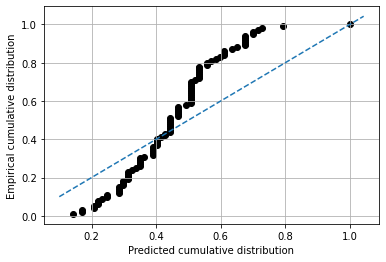

End2end test calibration error when step size is 0.001:  23.91433420475629
End2end test calibration error when step size is 0.01:  2.369754596053298
End2end test calibration error when step size is 0.1:  0.19501602293810097


In [5]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.16it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.30it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.94it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.602
  RMSE          1.036
  MDAE          0.237
  MARPD         20.655
  R2            0.996
  Correlation   0.999
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.288
  Mean-absolute Calibration Error       0.256
  Miscalibration Area                   0.259
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.373
     Group Size: 0.56 -- Calibration Error: 0.303
     Group Size: 1.00 -- Calibration Error: 0.256
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.446
     Group Size: 0.56 -- Calibration Error: 0.338
     Group Size: 1.00 -- Calibration Error: 0.288
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.08887768, 57.189144)
lims: (-0.08887768, 62.42)
lims_ext: (-6.339765357971192, 68.67088584899902)


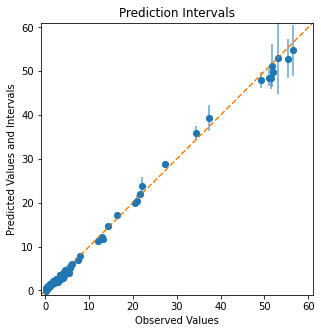

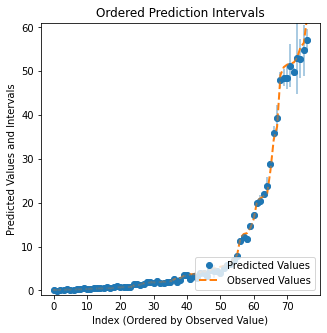

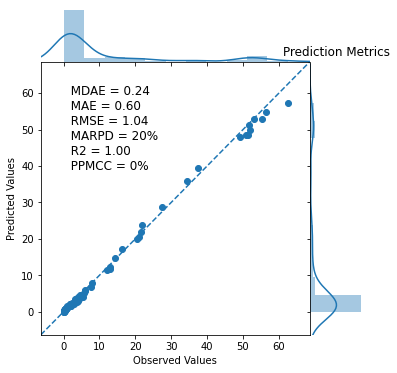

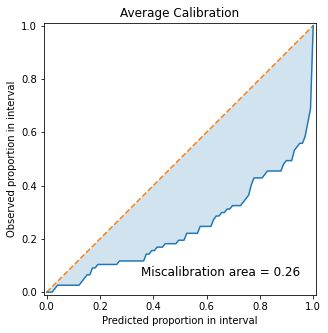

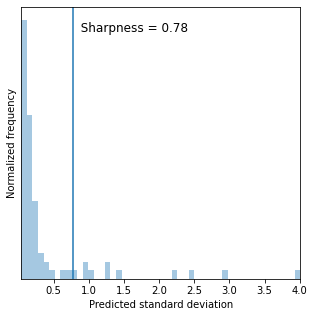

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [4]:
nllk_model = end2end_crps.train_model_nllk(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = .998)

initial loss:  1.0859073400497437
final loss:  -7.24367094039917


End2end test MAPE:  0.36813524
End2end test RMSE:  1.4868225
End2end test NLLK:  3.6367595
End2end test CRPS:  tensor(0.6495)


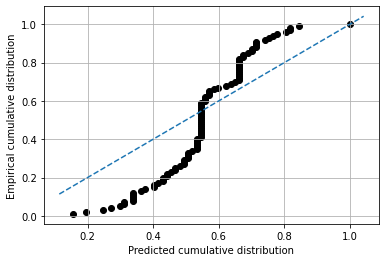

End2end test calibration error when step size is 0.001:  26.275274666891548
End2end test calibration error when step size is 0.01:  2.6107024793388427
End2end test calibration error when step size is 0.1:  0.22871479170180462


In [6]:
mean_pred, var_pred = nllk_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [7]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.87it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.46it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.38it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.846
  RMSE          1.487
  MDAE          0.322
  MARPD         23.677
  R2            0.993
  Correlation   0.996
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.306
  Mean-absolute Calibration Error       0.281
  Miscalibration Area                   0.284
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.397
     Group Size: 0.56 -- Calibration Error: 0.316
     Group Size: 1.00 -- Calibration Error: 0.281
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.455
     Group Size: 0.56 -- Calibration Error: 0.363
     Group Size: 1.00 -- Calibration Error: 0.306
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.09112549, 59.574467)
lims: (-0.09112549, 62.42)
lims_ext: (-6.342237854003907, 68.67111053466797)


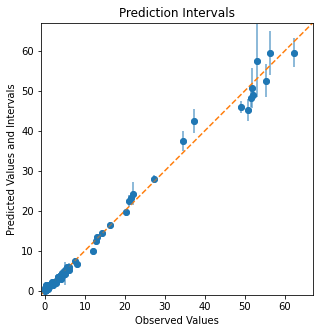

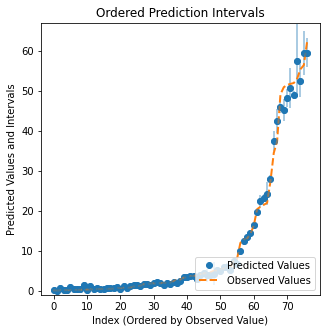

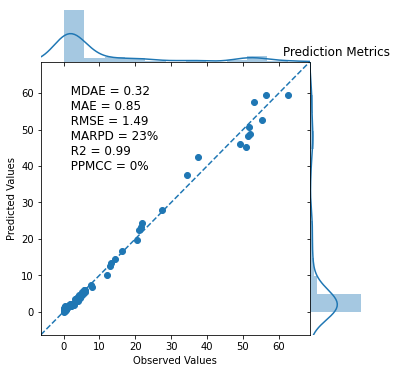

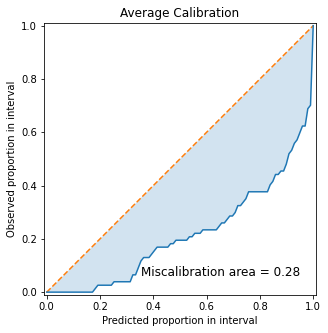

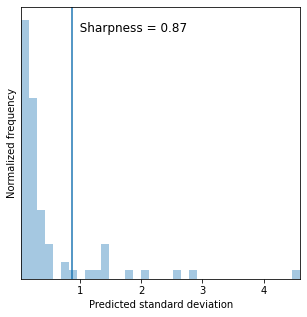

In [8]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [9]:
crps_model = end2end_crps.train_model_crps(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = .998)

initial loss:  0.5190802216529846
final loss:  0.009921187534928322


End2end test MAPE:  0.31059775
End2end test RMSE:  1.2823462
End2end test NLLK:  11.672567
End2end test CRPS:  tensor(0.5636)


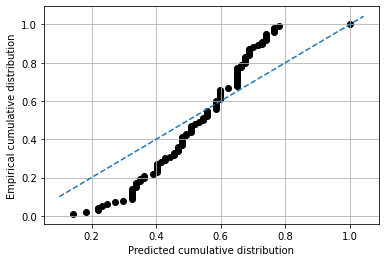

End2end test calibration error when step size is 0.001:  18.640021841794567
End2end test calibration error when step size is 0.01:  1.8477137797267666
End2end test calibration error when step size is 0.1:  0.150522853769607


In [10]:
mean_pred, var_pred = crps_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [11]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.80it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.52it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.34it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.665
  RMSE          1.282
  MDAE          0.278
  MARPD         22.128
  R2            0.995
  Correlation   0.998
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.265
  Mean-absolute Calibration Error       0.229
  Miscalibration Area                   0.232
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.378
     Group Size: 0.56 -- Calibration Error: 0.279
     Group Size: 1.00 -- Calibration Error: 0.229
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.437
     Group Size: 0.56 -- Calibration Error: 0.323
     Group Size: 1.00 -- Calibration Error: 0.265
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.26632214, 57.675896)
lims: (-0.26632214, 62.42)
lims_ext: (-6.534954261779785, 68.68863029479981)


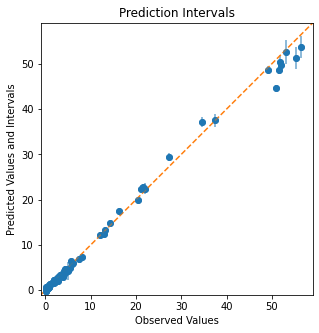

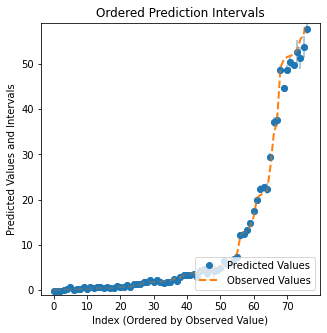

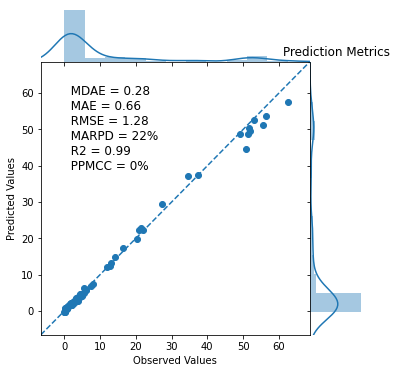

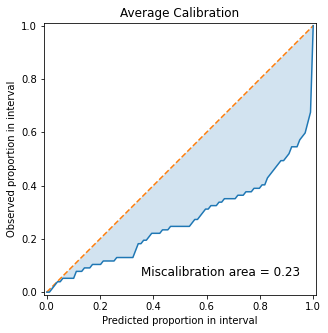

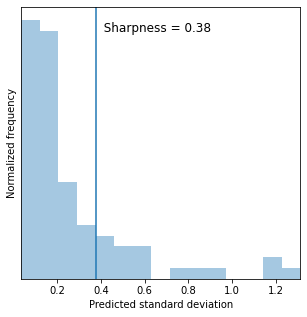

In [12]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [4]:
# calibration error alone
cal_model = end2end_crps.train_model_calibration(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = 0.998)

initial loss:  0.5051324963569641
cal loss:  0.5051324963569641 cal error: 0.19795841209829865
cal loss:  0.4961274266242981 cal error: 0.1305482041587902
cal loss:  0.26676857471466064 cal error: 0.1907183364839319
cal loss:  0.3850833773612976 cal error: 0.1238941398865785
cal loss:  0.7544794678688049 cal error: 0.16052930056710782
cal loss:  0.6744692325592041 cal error: 0.14676748582230625
cal loss:  0.49176785349845886 cal error: 0.1511342155009452
cal loss:  0.4623969793319702 cal error: 0.14831758034026463
cal loss:  0.325804740190506 cal error: 0.1525897920604915
cal loss:  0.3778964877128601 cal error: 0.16529300567107746
cal loss:  0.7051976323127747 cal error: 0.17848771266540647
cal loss:  0.510047197341919 cal error: 0.3058034026465028
cal loss:  0.3885936439037323 cal error: 0.21124763705103966
cal loss:  0.4683265686035156 cal error: 0.1995463137996219
cal loss:  0.40111371874809265 cal error: 0.2047448015122873
cal loss:  0.41843393445014954 cal error: 0.19551984877126

cal loss:  0.08820437639951706 cal error: 0.03954631379962192
cal loss:  0.19381779432296753 cal error: 0.012211720226843126
cal loss:  0.10842639207839966 cal error: 0.05361058601134215
cal loss:  0.16848565638065338 cal error: 0.009943289224952752
cal loss:  0.1255672425031662 cal error: 0.06020793950850661
cal loss:  0.10698433965444565 cal error: 0.01213610586011343
cal loss:  0.11572616547346115 cal error: 0.008449905482041602
cal loss:  0.08312291651964188 cal error: 0.019810964083175793
cal loss:  0.06372576206922531 cal error: 0.007750472589792071
cal loss:  0.2135622501373291 cal error: 0.02862003780718339
cal loss:  0.1452079713344574 cal error: 0.060075614366729674
cal loss:  0.2054564207792282 cal error: 0.028790170132325175
cal loss:  0.09733705222606659 cal error: 0.06213610586011341
cal loss:  0.13028651475906372 cal error: 0.00896030245746692
cal loss:  0.13286224007606506 cal error: 0.009867674858223076
cal loss:  0.19465723633766174 cal error: 0.010378071833648403
cal

cal loss:  0.07058421522378922 cal error: 0.1203213610586011
cal loss:  0.08898003399372101 cal error: 0.010056710775047247
cal loss:  0.1485379934310913 cal error: 0.07903591682419663
cal loss:  0.05836910009384155 cal error: 0.04126654064272211
cal loss:  0.08929619193077087 cal error: 0.009432892249527421
cal loss:  0.06127893924713135 cal error: 0.01500945179584122
cal loss:  0.1098117083311081 cal error: 0.012967863894139892
cal loss:  0.07436885684728622 cal error: 0.058506616257088855
cal loss:  0.09831757843494415 cal error: 0.014990548204158802
cal loss:  0.06653256714344025 cal error: 0.04782608695652175
cal loss:  0.1725119799375534 cal error: 0.027258979206049173
cal loss:  0.0732487365603447 cal error: 0.10782608695652172
cal loss:  0.0798286497592926 cal error: 0.00945179584120984
cal loss:  0.05124906450510025 cal error: 0.03612476370510396
cal loss:  0.07632207870483398 cal error: 0.010567107750472596
cal loss:  0.09994666278362274 cal error: 0.012041587901701331
cal lo

cal loss:  0.07377426326274872 cal error: 0.01729678638941398
cal loss:  0.10308513790369034 cal error: 0.022608695652173924
cal loss:  0.05359268561005592 cal error: 0.11508506616257087
cal loss:  0.07264455407857895 cal error: 0.01644612476370512
cal loss:  0.07771015167236328 cal error: 0.07147448015122869
cal loss:  0.062427349388599396 cal error: 0.06028355387523632
cal loss:  0.037181612104177475 cal error: 0.017542533081285443
cal loss:  0.07112249732017517 cal error: 0.021928166351606816
cal loss:  0.07066891342401505 cal error: 0.03897920604914932
cal loss:  0.06455421447753906 cal error: 0.020907372400756144
cal loss:  0.09081660211086273 cal error: 0.03448015122873348
cal loss:  0.07741551101207733 cal error: 0.09440453686200374
cal loss:  0.05120882764458656 cal error: 0.014385633270321373
cal loss:  0.037098176777362823 cal error: 0.013667296786389425
cal loss:  0.04937158524990082 cal error: 0.013837429111531201
cal loss:  0.06809528172016144 cal error: 0.0157466918714555

cal loss:  0.06067241355776787 cal error: 0.009262759924385638
cal loss:  0.04862925037741661 cal error: 0.06527410207939506
cal loss:  0.07134082913398743 cal error: 0.017844990548204178
cal loss:  0.04706525430083275 cal error: 0.11646502835538745
cal loss:  0.06034082919359207 cal error: 0.009848771266540653
cal loss:  0.06358558684587479 cal error: 0.06962192816635165
cal loss:  0.04351101070642471 cal error: 0.026313799621928143
cal loss:  0.08349623531103134 cal error: 0.0632514177693762
cal loss:  0.051578816026449203 cal error: 0.09323251417769374
cal loss:  0.028562013059854507 cal error: 0.008979206049149351
cal loss:  0.05605613440275192 cal error: 0.008393194706994333
cal loss:  0.05977184325456619 cal error: 0.03491493383742914
cal loss:  0.05605795606970787 cal error: 0.04981096408317577
cal loss:  0.07620752602815628 cal error: 0.07550094517958417
cal loss:  0.05549672991037369 cal error: 0.05793950850661624
cal loss:  0.0562891811132431 cal error: 0.00884688090737241
ca

cal loss:  0.0492512583732605 cal error: 0.030982986767485843
cal loss:  0.04939457029104233 cal error: 0.022079395085066147
cal loss:  0.07509398460388184 cal error: 0.09141776937618153
cal loss:  0.04432269185781479 cal error: 0.03964083175803402
cal loss:  0.07149025052785873 cal error: 0.023497164461247652
cal loss:  0.05707167461514473 cal error: 0.13223062381852546
cal loss:  0.06358714401721954 cal error: 0.007372400756143676
cal loss:  0.0361173152923584 cal error: 0.04275992438563325
cal loss:  0.05053689330816269 cal error: 0.01752362948960304
cal loss:  0.04397964105010033 cal error: 0.04075614366729677
cal loss:  0.04808199405670166 cal error: 0.028676748582230637
cal loss:  0.03162219002842903 cal error: 0.02071833648393194
cal loss:  0.06031311675906181 cal error: 0.014763705103969776
cal loss:  0.05454216152429581 cal error: 0.04731568998109639
cal loss:  0.07134212553501129 cal error: 0.05674858223062383
cal loss:  0.04862058162689209 cal error: 0.05412098298676746
cal 

cal loss:  0.044787246733903885 cal error: 0.048865784499054835
cal loss:  0.038879960775375366 cal error: 0.004612476370510403
cal loss:  0.05306189879775047 cal error: 0.022948960302457487
cal loss:  0.036050938069820404 cal error: 0.03843100189035914
cal loss:  0.06095379963517189 cal error: 0.007240075614366739
cal loss:  0.04194503277540207 cal error: 0.058374291115311894
cal loss:  0.055128246545791626 cal error: 0.008846880907372408
cal loss:  0.042151227593421936 cal error: 0.07001890359168242
cal loss:  0.0594639852643013 cal error: 0.007637051039697554
cal loss:  0.03778459504246712 cal error: 0.09742911153119088
cal loss:  0.03632393479347229 cal error: 0.02727788279773155
cal loss:  0.04615158587694168 cal error: 0.006899810964083184
cal loss:  0.0466989204287529 cal error: 0.005897920604914932
cal loss:  0.03353634476661682 cal error: 0.005897920604914932
cal loss:  0.051404476165771484 cal error: 0.02066162570888471
cal loss:  0.050303153693675995 cal error: 0.03423440453

cal loss:  0.024309726431965828 cal error: 0.030075614366729658
cal loss:  0.04182733595371246 cal error: 0.007296786389413983
cal loss:  0.04167356342077255 cal error: 0.0500756143667297
cal loss:  0.04499712586402893 cal error: 0.003383742911153124
cal loss:  0.023594584316015244 cal error: 0.01820415879017012
cal loss:  0.0404338613152504 cal error: 0.004499054820415877
cal loss:  0.027929432690143585 cal error: 0.004499054820415877
cal loss:  0.048022616654634476 cal error: 0.016351606805293024
cal loss:  0.03285438194870949 cal error: 0.02202268431001889
cal loss:  0.04829757288098335 cal error: 0.00534971644612477
cal loss:  0.036173682659864426 cal error: 0.020226843100189025
cal loss:  0.04595314338803291 cal error: 0.007504725897920613
cal loss:  0.029756316915154457 cal error: 0.014839319470699436
cal loss:  0.06547163426876068 cal error: 0.006465028355387535
cal loss:  0.03401481732726097 cal error: 0.10979206049149337
cal loss:  0.035195931792259216 cal error: 0.00580340264

cal loss:  0.033185627311468124 cal error: 0.004499054820415884
cal loss:  0.06293095648288727 cal error: 0.013308128544423462
cal loss:  0.0325494185090065 cal error: 0.04591682419659733
cal loss:  0.0404868945479393 cal error: 0.004215500945179591
cal loss:  0.05454706773161888 cal error: 0.004688090737240084
cal loss:  0.03772323206067085 cal error: 0.038204158790170126
cal loss:  0.038073185831308365 cal error: 0.005160680529300575
cal loss:  0.033710505813360214 cal error: 0.004820415879017021
cal loss:  0.04814569279551506 cal error: 0.004650283553875242
cal loss:  0.030150899663567543 cal error: 0.015198487712665399
cal loss:  0.0434957779943943 cal error: 0.006483931947069945
cal loss:  0.04330816492438316 cal error: 0.025652173913043464
cal loss:  0.04115936905145645 cal error: 0.01459357277882799
cal loss:  0.02704867348074913 cal error: 0.008865784499054822
cal loss:  0.043379127979278564 cal error: 0.0121928166351607
cal loss:  0.04600788280367851 cal error: 0.0151984877126

cal loss:  0.03859396651387215 cal error: 0.005047258979206054
cal loss:  0.02476256899535656 cal error: 0.004914933837429117
cal loss:  0.04262847080826759 cal error: 0.004952741020793959
cal loss:  0.034448713064193726 cal error: 0.0266351606805293
cal loss:  0.047746263444423676 cal error: 0.004952741020793959
cal loss:  0.022651799023151398 cal error: 0.010207939508506614
cal loss:  0.04713525250554085 cal error: 0.004877126654064281
cal loss:  0.025202304124832153 cal error: 0.016767485822306222
cal loss:  0.04537462070584297 cal error: 0.004612476370510406
cal loss:  0.037265654653310776 cal error: 0.018468809073724002
cal loss:  0.04809914529323578 cal error: 0.010661625708884709
cal loss:  0.033072005957365036 cal error: 0.0194328922495274
cal loss:  0.04153648763895035 cal error: 0.006729678638941413
cal loss:  0.022437019273638725 cal error: 0.009130434782608686
cal loss:  0.05353819206357002 cal error: 0.00557655954631381
cal loss:  0.021764688193798065 cal error: 0.02372400

cal loss:  0.03190959617495537 cal error: 0.005425330812854444
cal loss:  0.03959343954920769 cal error: 0.004669187145557664
cal loss:  0.029177550226449966 cal error: 0.007504725897920602
cal loss:  0.04553071781992912 cal error: 0.0069754253308128575
cal loss:  0.037219736725091934 cal error: 0.004706994328922501
cal loss:  0.0546412393450737 cal error: 0.019886578449905497
cal loss:  0.03346899524331093 cal error: 0.014896030245746686
cal loss:  0.04715817794203758 cal error: 0.004763705103969763
cal loss:  0.03509146347641945 cal error: 0.011644612476370511
cal loss:  0.04524650797247887 cal error: 0.009017013232514193
cal loss:  0.026012476533651352 cal error: 0.011644612476370511
cal loss:  0.025077879428863525 cal error: 0.0051417769376181505
cal loss:  0.0434718132019043 cal error: 0.005992438563327035
cal loss:  0.03806162253022194 cal error: 0.018223062381852548
cal loss:  0.04670184478163719 cal error: 0.007523629489603038
cal loss:  0.027742356061935425 cal error: 0.009603

cal loss:  0.021807517856359482 cal error: 0.013799621928166349
cal loss:  0.027691813185811043 cal error: 0.006313799621928165
cal loss:  0.0296742282807827 cal error: 0.004688090737240085
cal loss:  0.051449377089738846 cal error: 0.0061247637051039866
cal loss:  0.02598281018435955 cal error: 0.007826086956521736
cal loss:  0.03449999913573265 cal error: 0.0051039697542533125
cal loss:  0.04336736351251602 cal error: 0.0063327032136106
cal loss:  0.04069187864661217 cal error: 0.004801512287334598
cal loss:  0.027723899111151695 cal error: 0.01039697542533081
cal loss:  0.025514015927910805 cal error: 0.005765595463137999
cal loss:  0.03083902597427368 cal error: 0.004858223062381861
cal loss:  0.023678794503211975 cal error: 0.008752362948960304
cal loss:  0.045021213591098785 cal error: 0.005160680529300575
cal loss:  0.026303699240088463 cal error: 0.008752362948960304
cal loss:  0.02385571599006653 cal error: 0.0053308128544423475
cal loss:  0.0365629568696022 cal error: 0.01735

cal loss:  0.03383637219667435 cal error: 0.005652173913043482
cal loss:  0.03705155849456787 cal error: 0.005198487712665413
cal loss:  0.04525464400649071 cal error: 0.005236294896030247
cal loss:  0.02785320207476616 cal error: 0.010340264650283548
cal loss:  0.038622863590717316 cal error: 0.006578449905482055
cal loss:  0.03451232239603996 cal error: 0.006502835538752366
cal loss:  0.033078260719776154 cal error: 0.006748582230623832
cal loss:  0.031113844364881516 cal error: 0.0051984877126654136
cal loss:  0.03679366409778595 cal error: 0.005160680529300571
cal loss:  0.049846671521663666 cal error: 0.011134215500945191
cal loss:  0.03168939799070358 cal error: 0.006767485822306242
cal loss:  0.049081120640039444 cal error: 0.009603024574669192
cal loss:  0.03180408105254173 cal error: 0.011512287334593566
cal loss:  0.03536396846175194 cal error: 0.006370510396975441
cal loss:  0.029473666101694107 cal error: 0.005349716446124769
cal loss:  0.030766133219003677 cal error: 0.005

cal loss:  0.0378548763692379 cal error: 0.007580340264650292
cal loss:  0.03001757711172104 cal error: 0.005822306238185258
cal loss:  0.03191465884447098 cal error: 0.005444234404536867
cal loss:  0.03078063204884529 cal error: 0.006616257088846893
cal loss:  0.030014825984835625 cal error: 0.005444234404536867
cal loss:  0.04348521679639816 cal error: 0.008960302457466929
cal loss:  0.02877788618206978 cal error: 0.005085066162570894
cal loss:  0.034461647272109985 cal error: 0.005689981096408323
cal loss:  0.032172974199056625 cal error: 0.005916824196597369
cal loss:  0.025687487795948982 cal error: 0.005614366729678643
cal loss:  0.03308463841676712 cal error: 0.005557655954631383
cal loss:  0.037178102880716324 cal error: 0.007901701323251426
cal loss:  0.0372563935816288 cal error: 0.0065028355387523745
cal loss:  0.051125966012477875 cal error: 0.007580340264650293
cal loss:  0.03357147052884102 cal error: 0.007844990548204159
cal loss:  0.023307103663682938 cal error: 0.00546

cal loss:  0.034742116928100586 cal error: 0.006899810964083186
cal loss:  0.023725148290395737 cal error: 0.0067674858223062415
cal loss:  0.04519173502922058 cal error: 0.00775047258979207
cal loss:  0.02694121189415455 cal error: 0.006937618147448014
cal loss:  0.041735079139471054 cal error: 0.007221172022684307
cal loss:  0.03395473212003708 cal error: 0.007296786389413987
cal loss:  0.04653067886829376 cal error: 0.008298676748582241
cal loss:  0.036466777324676514 cal error: 0.007164461247637062
cal loss:  0.0338984914124012 cal error: 0.007277882797731579
cal loss:  0.03697727993130684 cal error: 0.005916824196597366
cal loss:  0.03981151431798935 cal error: 0.007240075614366727
cal loss:  0.028296250849962234 cal error: 0.006956521739130448
cal loss:  0.042539212852716446 cal error: 0.007372400756143677
cal loss:  0.02927643619477749 cal error: 0.007240075614366731
cal loss:  0.04731778800487518 cal error: 0.007277882797731579
cal loss:  0.026492293924093246 cal error: 0.00657

cal loss:  0.027582436800003052 cal error: 0.006559546313799633
cal loss:  0.041859038174152374 cal error: 0.00775047258979207
cal loss:  0.038623299449682236 cal error: 0.0066351606805293145
cal loss:  0.045851562172174454 cal error: 0.007334593572778839
cal loss:  0.024766840040683746 cal error: 0.009886578449905467
cal loss:  0.03576317057013512 cal error: 0.006351606805293021
cal loss:  0.032103247940540314 cal error: 0.007221172022684319
cal loss:  0.028778279200196266 cal error: 0.007391304347826099
cal loss:  0.03670836240053177 cal error: 0.007580340264650293
cal loss:  0.038417164236307144 cal error: 0.007580340264650293
cal loss:  0.026544220745563507 cal error: 0.00684310018903593
cal loss:  0.032683711498975754 cal error: 0.006351606805293021
cal loss:  0.0344381220638752 cal error: 0.006143667296786403
cal loss:  0.05123906582593918 cal error: 0.007485822306238194
cal loss:  0.03307190164923668 cal error: 0.009338374291115302
cal loss:  0.020795663818717003 cal error: 0.00

End2end test MAPE:  0.50671047
End2end test RMSE:  3.7631364
End2end test NLLK:  11.479098
End2end test CRPS:  tensor(1.5279)


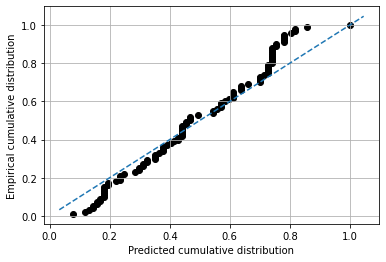

End2end test calibration error when step size is 0.001:  5.078680300219261
End2end test calibration error when step size is 0.01:  0.5027955810423342
End2end test calibration error when step size is 0.1:  0.03762017203575645


In [5]:
mean_pred, var_pred = cal_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.23it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 10.33it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 10.68it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           1.786
  RMSE          3.763
  MDAE          0.422
  MARPD         31.032
  R2            0.953
  Correlation   0.986
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.134
  Mean-absolute Calibration Error       0.105
  Miscalibration Area                   0.106
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.303
     Group Size: 0.56 -- Calibration Error: 0.144
     Group Size: 1.00 -- Calibration Error: 0.105
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.330
     Group Size: 0.56 -- Calibration Error: 0.185
     Group Size: 1.00 -- Calibration Error: 0.134
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-1.0052452, 48.8005)
lims: (-1.0052452, 62.42)
lims_ext: (-7.34776954650879, 68.76252250671386)


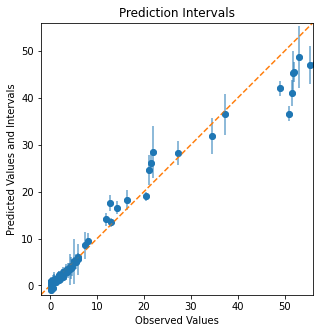

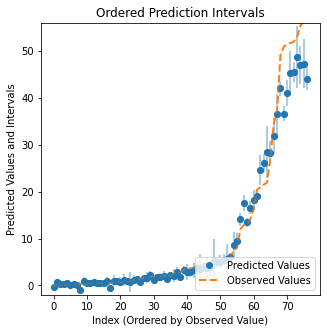

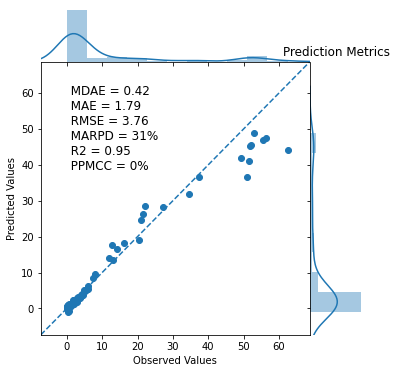

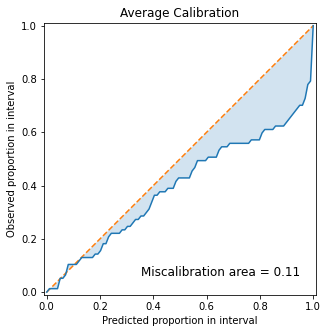

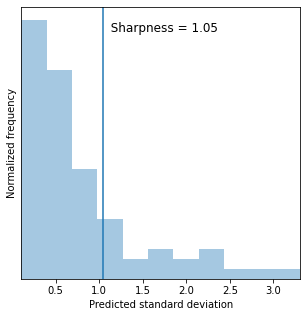

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [4]:
# using both
cal_model = end2end_crps.train_model_calibration(x_train, y_train, n_epoch = 2000, hidden_layers = [30, 30], learning_rate = 0.001, exp_decay = 0.998)

initial loss:  23.08671760559082
cal loss:  0.5486873984336853 cal error: 0.12310018903591682 nllk loss:  tensor(1.1392, grad_fn=<MeanBackward0>)
cal loss:  0.7655696868896484 cal error: 0.12190926275992438 nllk loss:  tensor(1.0816, grad_fn=<MeanBackward0>)
cal loss:  0.44586610794067383 cal error: 0.18922495274102075 nllk loss:  tensor(1.0233, grad_fn=<MeanBackward0>)
cal loss:  0.30093616247177124 cal error: 0.1398298676748582 nllk loss:  tensor(1.0167, grad_fn=<MeanBackward0>)
cal loss:  0.3253310024738312 cal error: 0.14886578449905483 nllk loss:  tensor(0.9470, grad_fn=<MeanBackward0>)
cal loss:  0.4794822633266449 cal error: 0.16349716446124762 nllk loss:  tensor(0.9286, grad_fn=<MeanBackward0>)
cal loss:  0.5648527145385742 cal error: 0.16546313799621928 nllk loss:  tensor(0.9161, grad_fn=<MeanBackward0>)
cal loss:  0.48157799243927 cal error: 0.16706994328922498 nllk loss:  tensor(0.8649, grad_fn=<MeanBackward0>)
cal loss:  0.6816681027412415 cal error: 0.16965973534971646 nll

cal loss:  0.18637120723724365 cal error: 0.06495274102079393 nllk loss:  tensor(-1.0661, grad_fn=<MeanBackward0>)
cal loss:  0.16751843690872192 cal error: 0.11981096408317578 nllk loss:  tensor(-1.1286, grad_fn=<MeanBackward0>)
cal loss:  0.22572149336338043 cal error: 0.03413988657844992 nllk loss:  tensor(-0.9821, grad_fn=<MeanBackward0>)
cal loss:  0.2408837378025055 cal error: 0.10330812854442345 nllk loss:  tensor(-1.1833, grad_fn=<MeanBackward0>)
cal loss:  0.14596204459667206 cal error: 0.03563327032136105 nllk loss:  tensor(-1.0935, grad_fn=<MeanBackward0>)
cal loss:  0.1738368719816208 cal error: 0.056389413988657856 nllk loss:  tensor(-1.1878, grad_fn=<MeanBackward0>)
cal loss:  0.14341223239898682 cal error: 0.035066162570888494 nllk loss:  tensor(-1.1214, grad_fn=<MeanBackward0>)
cal loss:  0.1917736828327179 cal error: 0.05240075614366729 nllk loss:  tensor(-1.2647, grad_fn=<MeanBackward0>)
cal loss:  0.27649420499801636 cal error: 0.037013232514177694 nllk loss:  tensor

cal loss:  0.14730960130691528 cal error: 0.08192816635160684 nllk loss:  tensor(-1.9070, grad_fn=<MeanBackward0>)
cal loss:  0.19709980487823486 cal error: 0.3492249527410208 nllk loss:  tensor(-2.3413, grad_fn=<MeanBackward0>)
cal loss:  0.1534501016139984 cal error: 0.014763705103969751 nllk loss:  tensor(-2.4543, grad_fn=<MeanBackward0>)
cal loss:  0.22468425333499908 cal error: 0.16132325141776932 nllk loss:  tensor(-2.5532, grad_fn=<MeanBackward0>)
cal loss:  0.12479984760284424 cal error: 0.05746691871455574 nllk loss:  tensor(-2.5804, grad_fn=<MeanBackward0>)
cal loss:  0.2735368609428406 cal error: 0.017882797731569002 nllk loss:  tensor(-2.4009, grad_fn=<MeanBackward0>)
cal loss:  0.06302467733621597 cal error: 0.5229300567107751 nllk loss:  tensor(-2.1066, grad_fn=<MeanBackward0>)
cal loss:  0.16143281757831573 cal error: 0.02175803402646504 nllk loss:  tensor(-2.2493, grad_fn=<MeanBackward0>)
cal loss:  0.13498294353485107 cal error: 0.45729678638941396 nllk loss:  tensor(-

cal loss:  0.11582538485527039 cal error: 0.41514177693761806 nllk loss:  tensor(-2.9305, grad_fn=<MeanBackward0>)
cal loss:  0.13900421559810638 cal error: 0.03068052930056712 nllk loss:  tensor(-2.7605, grad_fn=<MeanBackward0>)
cal loss:  0.11498821526765823 cal error: 0.5013043478260868 nllk loss:  tensor(-2.7573, grad_fn=<MeanBackward0>)
cal loss:  0.07735548913478851 cal error: 0.002703213610586017 nllk loss:  tensor(-3.0342, grad_fn=<MeanBackward0>)
cal loss:  0.12726910412311554 cal error: 0.08338374291115311 nllk loss:  tensor(-3.2320, grad_fn=<MeanBackward0>)
cal loss:  0.12215431034564972 cal error: 0.012022684310018896 nllk loss:  tensor(-3.1995, grad_fn=<MeanBackward0>)
cal loss:  0.10546617954969406 cal error: 0.016275992438563324 nllk loss:  tensor(-3.2250, grad_fn=<MeanBackward0>)
cal loss:  0.1603052318096161 cal error: 0.0069187145557656 nllk loss:  tensor(-3.1675, grad_fn=<MeanBackward0>)
cal loss:  0.09635992348194122 cal error: 0.1794706994328922 nllk loss:  tensor(

cal loss:  0.10125294327735901 cal error: 0.34986767485822295 nllk loss:  tensor(-3.2989, grad_fn=<MeanBackward0>)
cal loss:  0.15251560509204865 cal error: 0.028260869565217415 nllk loss:  tensor(-3.3163, grad_fn=<MeanBackward0>)
cal loss:  0.14139367640018463 cal error: 0.3925141776937618 nllk loss:  tensor(-3.2361, grad_fn=<MeanBackward0>)
cal loss:  0.1675199270248413 cal error: 0.014310018903591695 nllk loss:  tensor(-3.4014, grad_fn=<MeanBackward0>)
cal loss:  0.10209434479475021 cal error: 0.3734215500945179 nllk loss:  tensor(-3.3163, grad_fn=<MeanBackward0>)
cal loss:  0.11690305918455124 cal error: 0.02665406427221174 nllk loss:  tensor(-3.2797, grad_fn=<MeanBackward0>)
cal loss:  0.12480539083480835 cal error: 0.3732136105860114 nllk loss:  tensor(-3.2954, grad_fn=<MeanBackward0>)
cal loss:  0.1226714700460434 cal error: 0.013818525519848777 nllk loss:  tensor(-3.4053, grad_fn=<MeanBackward0>)
cal loss:  0.1310848593711853 cal error: 0.3851606805293005 nllk loss:  tensor(-3.

cal loss:  0.11936097592115402 cal error: 0.023818525519848775 nllk loss:  tensor(-3.6087, grad_fn=<MeanBackward0>)
cal loss:  0.09011131525039673 cal error: 0.37784499054820414 nllk loss:  tensor(-3.4733, grad_fn=<MeanBackward0>)
cal loss:  0.08081987500190735 cal error: 0.03015122873345938 nllk loss:  tensor(-3.5449, grad_fn=<MeanBackward0>)
cal loss:  0.154399573802948 cal error: 0.28933837429111525 nllk loss:  tensor(-3.6355, grad_fn=<MeanBackward0>)
cal loss:  0.09223917126655579 cal error: 0.049376181474480176 nllk loss:  tensor(-3.5079, grad_fn=<MeanBackward0>)
cal loss:  0.10077064484357834 cal error: 0.28448015122873344 nllk loss:  tensor(-3.6018, grad_fn=<MeanBackward0>)
cal loss:  0.07225815206766129 cal error: 0.025992438563327044 nllk loss:  tensor(-3.6444, grad_fn=<MeanBackward0>)
cal loss:  0.08225159347057343 cal error: 0.23440453686200374 nllk loss:  tensor(-3.7195, grad_fn=<MeanBackward0>)
cal loss:  0.06339029222726822 cal error: 0.016937618147448024 nllk loss:  tens

cal loss:  0.053728360682725906 cal error: 0.03865784499054823 nllk loss:  tensor(-3.8535, grad_fn=<MeanBackward0>)
cal loss:  0.09661908447742462 cal error: 0.1636294896030245 nllk loss:  tensor(-3.9540, grad_fn=<MeanBackward0>)
cal loss:  0.08308590948581696 cal error: 0.03674858223062385 nllk loss:  tensor(-3.8834, grad_fn=<MeanBackward0>)
cal loss:  0.10455939918756485 cal error: 0.20903591682419653 nllk loss:  tensor(-3.8866, grad_fn=<MeanBackward0>)
cal loss:  0.07110694795846939 cal error: 0.07117202268431005 nllk loss:  tensor(-3.7531, grad_fn=<MeanBackward0>)
cal loss:  0.08563432097434998 cal error: 0.22916824196597346 nllk loss:  tensor(-3.8163, grad_fn=<MeanBackward0>)
cal loss:  0.06220672279596329 cal error: 0.04926275992438565 nllk loss:  tensor(-3.8313, grad_fn=<MeanBackward0>)
cal loss:  0.06433208286762238 cal error: 0.1600567107750472 nllk loss:  tensor(-3.9753, grad_fn=<MeanBackward0>)
cal loss:  0.11961773037910461 cal error: 0.03013232514177695 nllk loss:  tensor(

cal loss:  0.09816574305295944 cal error: 0.057069943289224975 nllk loss:  tensor(-4.0375, grad_fn=<MeanBackward0>)
cal loss:  0.08374889940023422 cal error: 0.20892249527410198 nllk loss:  tensor(-4.0326, grad_fn=<MeanBackward0>)
cal loss:  0.07839900255203247 cal error: 0.01890359168241968 nllk loss:  tensor(-4.1877, grad_fn=<MeanBackward0>)
cal loss:  0.09686353802680969 cal error: 0.1550094517958412 nllk loss:  tensor(-4.2038, grad_fn=<MeanBackward0>)
cal loss:  0.09360706806182861 cal error: 0.04011342155009454 nllk loss:  tensor(-4.1006, grad_fn=<MeanBackward0>)
cal loss:  0.0843251645565033 cal error: 0.20512287334593565 nllk loss:  tensor(-4.0687, grad_fn=<MeanBackward0>)
cal loss:  0.07342292368412018 cal error: 0.05181474480151231 nllk loss:  tensor(-4.0347, grad_fn=<MeanBackward0>)
cal loss:  0.06112014502286911 cal error: 0.21865784499054816 nllk loss:  tensor(-4.0513, grad_fn=<MeanBackward0>)
cal loss:  0.061367426067590714 cal error: 0.03391304347826088 nllk loss:  tensor

cal loss:  0.07038216292858124 cal error: 0.03453686200378073 nllk loss:  tensor(-4.3078, grad_fn=<MeanBackward0>)
cal loss:  0.07789101451635361 cal error: 0.17355387523629487 nllk loss:  tensor(-4.2984, grad_fn=<MeanBackward0>)
cal loss:  0.07018932700157166 cal error: 0.042325141776937636 nllk loss:  tensor(-4.2641, grad_fn=<MeanBackward0>)
cal loss:  0.06553032249212265 cal error: 0.19782608695652168 nllk loss:  tensor(-4.2423, grad_fn=<MeanBackward0>)
cal loss:  0.06090586259961128 cal error: 0.03538752362948962 nllk loss:  tensor(-4.2990, grad_fn=<MeanBackward0>)
cal loss:  0.06965102255344391 cal error: 0.16591682419659734 nllk loss:  tensor(-4.3218, grad_fn=<MeanBackward0>)
cal loss:  0.07207107543945312 cal error: 0.0318147448015123 nllk loss:  tensor(-4.3222, grad_fn=<MeanBackward0>)
cal loss:  0.08853558450937271 cal error: 0.1579017013232514 nllk loss:  tensor(-4.3345, grad_fn=<MeanBackward0>)
cal loss:  0.05573773756623268 cal error: 0.03523629489603026 nllk loss:  tensor(

cal loss:  0.05669606477022171 cal error: 0.034120982986767495 nllk loss:  tensor(-4.4621, grad_fn=<MeanBackward0>)
cal loss:  0.07113739103078842 cal error: 0.13521739130434776 nllk loss:  tensor(-4.4682, grad_fn=<MeanBackward0>)
cal loss:  0.07412150502204895 cal error: 0.03714555765595465 nllk loss:  tensor(-4.4486, grad_fn=<MeanBackward0>)
cal loss:  0.09370353817939758 cal error: 0.15599243856332692 nllk loss:  tensor(-4.4217, grad_fn=<MeanBackward0>)
cal loss:  0.07297509908676147 cal error: 0.05370510396975427 nllk loss:  tensor(-4.3776, grad_fn=<MeanBackward0>)
cal loss:  0.07446832209825516 cal error: 0.16423440453686197 nllk loss:  tensor(-4.3965, grad_fn=<MeanBackward0>)
cal loss:  0.05018603801727295 cal error: 0.048809073724007584 nllk loss:  tensor(-4.3984, grad_fn=<MeanBackward0>)
cal loss:  0.0978340432047844 cal error: 0.14260869565217385 nllk loss:  tensor(-4.4587, grad_fn=<MeanBackward0>)
cal loss:  0.04527093097567558 cal error: 0.0463137996219282 nllk loss:  tensor

cal loss:  0.07131330668926239 cal error: 0.057296786389414 nllk loss:  tensor(-4.5702, grad_fn=<MeanBackward0>)
cal loss:  0.09954003989696503 cal error: 0.13419659735349712 nllk loss:  tensor(-4.5399, grad_fn=<MeanBackward0>)
cal loss:  0.07023759931325912 cal error: 0.07413988657844993 nllk loss:  tensor(-4.4750, grad_fn=<MeanBackward0>)
cal loss:  0.07256687432527542 cal error: 0.16459357277882788 nllk loss:  tensor(-4.4571, grad_fn=<MeanBackward0>)
cal loss:  0.060942310839891434 cal error: 0.0708506616257089 nllk loss:  tensor(-4.4870, grad_fn=<MeanBackward0>)
cal loss:  0.06832417845726013 cal error: 0.1443667296786389 nllk loss:  tensor(-4.5261, grad_fn=<MeanBackward0>)
cal loss:  0.044254835695028305 cal error: 0.05128544423440456 nllk loss:  tensor(-4.5775, grad_fn=<MeanBackward0>)
cal loss:  0.06410249322652817 cal error: 0.09958412098298676 nllk loss:  tensor(-4.6534, grad_fn=<MeanBackward0>)
cal loss:  0.03946337848901749 cal error: 0.03603024574669189 nllk loss:  tensor(-

cal loss:  0.07452442497015 cal error: 0.039565217391304364 nllk loss:  tensor(-4.7506, grad_fn=<MeanBackward0>)
cal loss:  0.061925433576107025 cal error: 0.09941398865784493 nllk loss:  tensor(-4.7387, grad_fn=<MeanBackward0>)
cal loss:  0.04946427792310715 cal error: 0.036956521739130464 nllk loss:  tensor(-4.7556, grad_fn=<MeanBackward0>)
cal loss:  0.05830242484807968 cal error: 0.08587901701323249 nllk loss:  tensor(-4.7736, grad_fn=<MeanBackward0>)
cal loss:  0.050859130918979645 cal error: 0.039432892249527424 nllk loss:  tensor(-4.7549, grad_fn=<MeanBackward0>)
cal loss:  0.06127901002764702 cal error: 0.10376181474480145 nllk loss:  tensor(-4.7556, grad_fn=<MeanBackward0>)
cal loss:  0.0631757378578186 cal error: 0.03648393194706997 nllk loss:  tensor(-4.7569, grad_fn=<MeanBackward0>)
cal loss:  0.034688908606767654 cal error: 0.06190926275992436 nllk loss:  tensor(-4.8141, grad_fn=<MeanBackward0>)
cal loss:  0.057324428111314774 cal error: 0.022306238185255213 nllk loss:  te

cal loss:  0.05536407232284546 cal error: 0.0562192816635161 nllk loss:  tensor(-4.7936, grad_fn=<MeanBackward0>)
cal loss:  0.08784189820289612 cal error: 0.09434782608695651 nllk loss:  tensor(-4.7982, grad_fn=<MeanBackward0>)
cal loss:  0.062431976199150085 cal error: 0.059054820415879054 nllk loss:  tensor(-4.7692, grad_fn=<MeanBackward0>)
cal loss:  0.058806709945201874 cal error: 0.10236294896030242 nllk loss:  tensor(-4.7841, grad_fn=<MeanBackward0>)
cal loss:  0.08702287077903748 cal error: 0.0468052930056711 nllk loss:  tensor(-4.8109, grad_fn=<MeanBackward0>)
cal loss:  0.06732848286628723 cal error: 0.10937618147448007 nllk loss:  tensor(-4.8048, grad_fn=<MeanBackward0>)
cal loss:  0.06810348480939865 cal error: 0.04115311909262761 nllk loss:  tensor(-4.8162, grad_fn=<MeanBackward0>)
cal loss:  0.11123354732990265 cal error: 0.10548204158790163 nllk loss:  tensor(-4.8235, grad_fn=<MeanBackward0>)
cal loss:  0.05152280628681183 cal error: 0.05614366729678642 nllk loss:  tenso

cal loss:  0.05451303720474243 cal error: 0.03285444234404539 nllk loss:  tensor(-4.9315, grad_fn=<MeanBackward0>)
cal loss:  0.033142589032649994 cal error: 0.06508506616257086 nllk loss:  tensor(-4.9677, grad_fn=<MeanBackward0>)
cal loss:  0.05710051953792572 cal error: 0.017769376181474488 nllk loss:  tensor(-4.9931, grad_fn=<MeanBackward0>)
cal loss:  0.0645378828048706 cal error: 0.06612476370510392 nllk loss:  tensor(-4.9841, grad_fn=<MeanBackward0>)
cal loss:  0.06387344002723694 cal error: 0.026805293005671083 nllk loss:  tensor(-4.9607, grad_fn=<MeanBackward0>)
cal loss:  0.06647545844316483 cal error: 0.06493383742911149 nllk loss:  tensor(-4.9804, grad_fn=<MeanBackward0>)
cal loss:  0.06367118656635284 cal error: 0.023478260869565237 nllk loss:  tensor(-4.9783, grad_fn=<MeanBackward0>)
cal loss:  0.07378097623586655 cal error: 0.06964083175803398 nllk loss:  tensor(-4.9755, grad_fn=<MeanBackward0>)
cal loss:  0.044764306396245956 cal error: 0.02793950850661627 nllk loss:  te

cal loss:  0.07802966237068176 cal error: 0.0695274102079395 nllk loss:  tensor(-5.0465, grad_fn=<MeanBackward0>)
cal loss:  0.048766616731882095 cal error: 0.027977315689981117 nllk loss:  tensor(-5.0159, grad_fn=<MeanBackward0>)
cal loss:  0.05760302394628525 cal error: 0.06321361058601133 nllk loss:  tensor(-5.0543, grad_fn=<MeanBackward0>)
cal loss:  0.04741840809583664 cal error: 0.02272211720226845 nllk loss:  tensor(-5.0590, grad_fn=<MeanBackward0>)
cal loss:  0.09442981332540512 cal error: 0.06283553875236293 nllk loss:  tensor(-5.0691, grad_fn=<MeanBackward0>)
cal loss:  0.03467854857444763 cal error: 0.029413988657845006 nllk loss:  tensor(-5.0167, grad_fn=<MeanBackward0>)
cal loss:  0.0717427060008049 cal error: 0.06215500945179581 nllk loss:  tensor(-5.0496, grad_fn=<MeanBackward0>)
cal loss:  0.04449114203453064 cal error: 0.030831758034026477 nllk loss:  tensor(-5.0284, grad_fn=<MeanBackward0>)
cal loss:  0.03452722728252411 cal error: 0.0650283553875236 nllk loss:  tenso

cal loss:  0.05668149143457413 cal error: 0.04085066162570886 nllk loss:  tensor(-5.1469, grad_fn=<MeanBackward0>)
cal loss:  0.065163254737854 cal error: 0.0233459357277883 nllk loss:  tensor(-5.1349, grad_fn=<MeanBackward0>)
cal loss:  0.055946286767721176 cal error: 0.05899810964083171 nllk loss:  tensor(-5.1164, grad_fn=<MeanBackward0>)
cal loss:  0.06322437524795532 cal error: 0.02587901701323252 nllk loss:  tensor(-5.1233, grad_fn=<MeanBackward0>)
cal loss:  0.03411121293902397 cal error: 0.05504725897920601 nllk loss:  tensor(-5.1344, grad_fn=<MeanBackward0>)
cal loss:  0.06791863590478897 cal error: 0.01565217391304349 nllk loss:  tensor(-5.1607, grad_fn=<MeanBackward0>)
cal loss:  0.08289308845996857 cal error: 0.03448015122873343 nllk loss:  tensor(-5.1789, grad_fn=<MeanBackward0>)
cal loss:  0.04704246670007706 cal error: 0.023270321361058614 nllk loss:  tensor(-5.1397, grad_fn=<MeanBackward0>)
cal loss:  0.0791781097650528 cal error: 0.05253308128544421 nllk loss:  tensor(-

cal loss:  0.051466669887304306 cal error: 0.053969754253308085 nllk loss:  tensor(-5.1896, grad_fn=<MeanBackward0>)
cal loss:  0.0710187628865242 cal error: 0.020151228733459366 nllk loss:  tensor(-5.1979, grad_fn=<MeanBackward0>)
cal loss:  0.06990829110145569 cal error: 0.06776937618147447 nllk loss:  tensor(-5.1762, grad_fn=<MeanBackward0>)
cal loss:  0.07158076763153076 cal error: 0.020396975425330827 nllk loss:  tensor(-5.1878, grad_fn=<MeanBackward0>)
cal loss:  0.05784619227051735 cal error: 0.058147448015122845 nllk loss:  tensor(-5.1922, grad_fn=<MeanBackward0>)
cal loss:  0.05149620398879051 cal error: 0.01947069943289226 nllk loss:  tensor(-5.1954, grad_fn=<MeanBackward0>)
cal loss:  0.06630179286003113 cal error: 0.054688090737240035 nllk loss:  tensor(-5.2035, grad_fn=<MeanBackward0>)
cal loss:  0.06515435874462128 cal error: 0.019716446124763715 nllk loss:  tensor(-5.1969, grad_fn=<MeanBackward0>)
cal loss:  0.06675302982330322 cal error: 0.04032136105860113 nllk loss:  

cal loss:  0.04057767614722252 cal error: 0.013591682419659742 nllk loss:  tensor(-5.2754, grad_fn=<MeanBackward0>)
cal loss:  0.05114314705133438 cal error: 0.02814744801512287 nllk loss:  tensor(-5.2976, grad_fn=<MeanBackward0>)
cal loss:  0.08226849138736725 cal error: 0.011909262759924388 nllk loss:  tensor(-5.2901, grad_fn=<MeanBackward0>)
cal loss:  0.038770563900470734 cal error: 0.02814744801512287 nllk loss:  tensor(-5.3007, grad_fn=<MeanBackward0>)
cal loss:  0.08157841116189957 cal error: 0.010434782608695656 nllk loss:  tensor(-5.2999, grad_fn=<MeanBackward0>)
cal loss:  0.07224633544683456 cal error: 0.0172211720226843 nllk loss:  tensor(-5.3181, grad_fn=<MeanBackward0>)
cal loss:  0.06310374289751053 cal error: 0.010907372400756146 nllk loss:  tensor(-5.3013, grad_fn=<MeanBackward0>)
cal loss:  0.043569859117269516 cal error: 0.018563327032136073 nllk loss:  tensor(-5.3089, grad_fn=<MeanBackward0>)
cal loss:  0.0313241221010685 cal error: 0.012589792060491503 nllk loss:  

cal loss:  0.07220058143138885 cal error: 0.03419659735349715 nllk loss:  tensor(-5.3267, grad_fn=<MeanBackward0>)
cal loss:  0.040525875985622406 cal error: 0.018241965973534977 nllk loss:  tensor(-5.3108, grad_fn=<MeanBackward0>)
cal loss:  0.06303056329488754 cal error: 0.03502835538752361 nllk loss:  tensor(-5.3239, grad_fn=<MeanBackward0>)
cal loss:  0.03304760158061981 cal error: 0.016086956521739134 nllk loss:  tensor(-5.3218, grad_fn=<MeanBackward0>)
cal loss:  0.06754709035158157 cal error: 0.024763705103969736 nllk loss:  tensor(-5.3509, grad_fn=<MeanBackward0>)
cal loss:  0.061303071677684784 cal error: 0.014971644612476376 nllk loss:  tensor(-5.3442, grad_fn=<MeanBackward0>)
cal loss:  0.0659012719988823 cal error: 0.017958412098298664 nllk loss:  tensor(-5.3632, grad_fn=<MeanBackward0>)
cal loss:  0.05005357414484024 cal error: 0.017164461247637056 nllk loss:  tensor(-5.3384, grad_fn=<MeanBackward0>)
cal loss:  0.060005299746990204 cal error: 0.02457466918714554 nllk loss:

cal loss:  0.06970284879207611 cal error: 0.02461247637051041 nllk loss:  tensor(-5.3432, grad_fn=<MeanBackward0>)
cal loss:  0.06400616466999054 cal error: 0.0313610586011342 nllk loss:  tensor(-5.3616, grad_fn=<MeanBackward0>)
cal loss:  0.044178374111652374 cal error: 0.025236294896030253 nllk loss:  tensor(-5.3466, grad_fn=<MeanBackward0>)
cal loss:  0.05346297472715378 cal error: 0.03338374291115309 nllk loss:  tensor(-5.3589, grad_fn=<MeanBackward0>)
cal loss:  0.057940781116485596 cal error: 0.021739130434782615 nllk loss:  tensor(-5.3576, grad_fn=<MeanBackward0>)
cal loss:  0.0696629136800766 cal error: 0.03837429111531188 nllk loss:  tensor(-5.3543, grad_fn=<MeanBackward0>)
cal loss:  0.055974118411540985 cal error: 0.020529300567107767 nllk loss:  tensor(-5.3567, grad_fn=<MeanBackward0>)
cal loss:  0.06870178878307343 cal error: 0.03744801512287332 nllk loss:  tensor(-5.3672, grad_fn=<MeanBackward0>)
cal loss:  0.040211547166109085 cal error: 0.021776937618147463 nllk loss:  

cal loss:  0.03771204128861427 cal error: 0.026994328922495266 nllk loss:  tensor(-5.4161, grad_fn=<MeanBackward0>)
cal loss:  0.07319986075162888 cal error: 0.012967863894139892 nllk loss:  tensor(-5.4250, grad_fn=<MeanBackward0>)
cal loss:  0.048105984926223755 cal error: 0.017429111531190904 nllk loss:  tensor(-5.4451, grad_fn=<MeanBackward0>)
cal loss:  0.07239726930856705 cal error: 0.01340264650283554 nllk loss:  tensor(-5.4352, grad_fn=<MeanBackward0>)
cal loss:  0.06954017281532288 cal error: 0.009773156899810943 nllk loss:  tensor(-5.4548, grad_fn=<MeanBackward0>)
cal loss:  0.08984837681055069 cal error: 0.012041587901701324 nllk loss:  tensor(-5.4472, grad_fn=<MeanBackward0>)
cal loss:  0.04519253969192505 cal error: 0.014593572778827968 nllk loss:  tensor(-5.4459, grad_fn=<MeanBackward0>)
cal loss:  0.0744793638586998 cal error: 0.01073724007561436 nllk loss:  tensor(-5.4461, grad_fn=<MeanBackward0>)
cal loss:  0.041060205549001694 cal error: 0.018922495274102082 nllk loss:

cal loss:  0.06627345085144043 cal error: 0.0071455576559546295 nllk loss:  tensor(-5.4948, grad_fn=<MeanBackward0>)
cal loss:  0.05641767382621765 cal error: 0.006956521739130426 nllk loss:  tensor(-5.4941, grad_fn=<MeanBackward0>)
cal loss:  0.06495363265275955 cal error: 0.009338374291115302 nllk loss:  tensor(-5.4951, grad_fn=<MeanBackward0>)
cal loss:  0.060071878135204315 cal error: 0.008525519848771267 nllk loss:  tensor(-5.4849, grad_fn=<MeanBackward0>)
cal loss:  0.059900205582380295 cal error: 0.012589792060491484 nllk loss:  tensor(-5.4879, grad_fn=<MeanBackward0>)
cal loss:  0.06127389147877693 cal error: 0.014517958412098308 nllk loss:  tensor(-5.4672, grad_fn=<MeanBackward0>)
cal loss:  0.04582031071186066 cal error: 0.021304347826086947 nllk loss:  tensor(-5.4691, grad_fn=<MeanBackward0>)
cal loss:  0.05041538178920746 cal error: 0.01652173913043479 nllk loss:  tensor(-5.4572, grad_fn=<MeanBackward0>)
cal loss:  0.0444730706512928 cal error: 0.022173913043478256 nllk los

cal loss:  0.06346200406551361 cal error: 0.009754253308128543 nllk loss:  tensor(-5.5137, grad_fn=<MeanBackward0>)
cal loss:  0.04484077915549278 cal error: 0.009981096408317566 nllk loss:  tensor(-5.5256, grad_fn=<MeanBackward0>)
cal loss:  0.07485107332468033 cal error: 0.007221172022684307 nllk loss:  tensor(-5.5258, grad_fn=<MeanBackward0>)
cal loss:  0.05939134955406189 cal error: 0.009432892249527397 nllk loss:  tensor(-5.5271, grad_fn=<MeanBackward0>)
cal loss:  0.053587306290864944 cal error: 0.007693761814744803 nllk loss:  tensor(-5.5255, grad_fn=<MeanBackward0>)
cal loss:  0.08482994139194489 cal error: 0.009206049149338365 nllk loss:  tensor(-5.5282, grad_fn=<MeanBackward0>)
cal loss:  0.04978454113006592 cal error: 0.010170132325141773 nllk loss:  tensor(-5.5126, grad_fn=<MeanBackward0>)
cal loss:  0.0531514510512352 cal error: 0.011701323251417754 nllk loss:  tensor(-5.5194, grad_fn=<MeanBackward0>)
cal loss:  0.07407528162002563 cal error: 0.009603024574669187 nllk loss

cal loss:  0.07522167265415192 cal error: 0.01412098298676748 nllk loss:  tensor(-5.5419, grad_fn=<MeanBackward0>)
cal loss:  0.05323231592774391 cal error: 0.013724007561436671 nllk loss:  tensor(-5.5234, grad_fn=<MeanBackward0>)
cal loss:  0.05095471814274788 cal error: 0.028147448015122853 nllk loss:  tensor(-5.5150, grad_fn=<MeanBackward0>)
cal loss:  0.029429785907268524 cal error: 0.01612476370510398 nllk loss:  tensor(-5.5130, grad_fn=<MeanBackward0>)
cal loss:  0.04789350554347038 cal error: 0.020548204158790155 nllk loss:  tensor(-5.5338, grad_fn=<MeanBackward0>)
cal loss:  0.07403132319450378 cal error: 0.012381852551984887 nllk loss:  tensor(-5.5315, grad_fn=<MeanBackward0>)
cal loss:  0.03635133430361748 cal error: 0.0212665406427221 nllk loss:  tensor(-5.5354, grad_fn=<MeanBackward0>)
cal loss:  0.04337657243013382 cal error: 0.010586011342155012 nllk loss:  tensor(-5.5437, grad_fn=<MeanBackward0>)
cal loss:  0.051261868327856064 cal error: 0.015916824196597335 nllk loss: 

cal loss:  0.06673305481672287 cal error: 0.0065028355387523615 nllk loss:  tensor(-5.5846, grad_fn=<MeanBackward0>)
cal loss:  0.0812854915857315 cal error: 0.006729678638941397 nllk loss:  tensor(-5.5852, grad_fn=<MeanBackward0>)
cal loss:  0.06835529208183289 cal error: 0.006446124763705098 nllk loss:  tensor(-5.5843, grad_fn=<MeanBackward0>)
cal loss:  0.04777232185006142 cal error: 0.009206049149338369 nllk loss:  tensor(-5.5841, grad_fn=<MeanBackward0>)
cal loss:  0.06073860079050064 cal error: 0.007693761814744791 nllk loss:  tensor(-5.5868, grad_fn=<MeanBackward0>)
cal loss:  0.06414369493722916 cal error: 0.0075236294896030235 nllk loss:  tensor(-5.5868, grad_fn=<MeanBackward0>)
cal loss:  0.05824026092886925 cal error: 0.007769376181474472 nllk loss:  tensor(-5.5873, grad_fn=<MeanBackward0>)
cal loss:  0.06108252704143524 cal error: 0.011096408317580346 nllk loss:  tensor(-5.5871, grad_fn=<MeanBackward0>)
cal loss:  0.056107744574546814 cal error: 0.007164461247637049 nllk lo

cal loss:  0.05784227326512337 cal error: 0.008865784499054818 nllk loss:  tensor(-5.6009, grad_fn=<MeanBackward0>)
cal loss:  0.052010342478752136 cal error: 0.007296786389413987 nllk loss:  tensor(-5.6038, grad_fn=<MeanBackward0>)
cal loss:  0.06768783926963806 cal error: 0.006559546313799621 nllk loss:  tensor(-5.6067, grad_fn=<MeanBackward0>)
cal loss:  0.039225295186042786 cal error: 0.007693761814744791 nllk loss:  tensor(-5.6057, grad_fn=<MeanBackward0>)
cal loss:  0.05807461962103844 cal error: 0.006597353497164459 nllk loss:  tensor(-5.6061, grad_fn=<MeanBackward0>)
cal loss:  0.06677190214395523 cal error: 0.006654064272211723 nllk loss:  tensor(-5.6084, grad_fn=<MeanBackward0>)
cal loss:  0.0563880130648613 cal error: 0.006862003780718341 nllk loss:  tensor(-5.6086, grad_fn=<MeanBackward0>)
cal loss:  0.06919843703508377 cal error: 0.006635160680529299 nllk loss:  tensor(-5.6076, grad_fn=<MeanBackward0>)
cal loss:  0.05167626217007637 cal error: 0.009735349716446122 nllk los

cal loss:  0.06461034715175629 cal error: 0.014480151228733442 nllk loss:  tensor(-5.6200, grad_fn=<MeanBackward0>)
cal loss:  0.06157585605978966 cal error: 0.011342155009451797 nllk loss:  tensor(-5.6120, grad_fn=<MeanBackward0>)
cal loss:  0.07549335807561874 cal error: 0.02349716446124762 nllk loss:  tensor(-5.6047, grad_fn=<MeanBackward0>)
cal loss:  0.05614647641777992 cal error: 0.0148960302457467 nllk loss:  tensor(-5.5947, grad_fn=<MeanBackward0>)
cal loss:  0.04341409355401993 cal error: 0.016408317580340257 nllk loss:  tensor(-5.6164, grad_fn=<MeanBackward0>)
cal loss:  0.048309244215488434 cal error: 0.009111531190926277 nllk loss:  tensor(-5.6200, grad_fn=<MeanBackward0>)
cal loss:  0.05876536667346954 cal error: 0.008638941398865781 nllk loss:  tensor(-5.6287, grad_fn=<MeanBackward0>)
cal loss:  0.0667782723903656 cal error: 0.010056710775047254 nllk loss:  tensor(-5.6205, grad_fn=<MeanBackward0>)
cal loss:  0.05006716400384903 cal error: 0.008506616257088845 nllk loss:  

cal loss:  0.07259242236614227 cal error: 0.008563327032136095 nllk loss:  tensor(-5.6522, grad_fn=<MeanBackward0>)
cal loss:  0.05081050097942352 cal error: 0.00945179584120982 nllk loss:  tensor(-5.6522, grad_fn=<MeanBackward0>)
cal loss:  0.04915391281247139 cal error: 0.008449905482041577 nllk loss:  tensor(-5.6525, grad_fn=<MeanBackward0>)
cal loss:  0.05394931882619858 cal error: 0.0091493383742911 nllk loss:  tensor(-5.6529, grad_fn=<MeanBackward0>)
cal loss:  0.07487224042415619 cal error: 0.010151228733459354 nllk loss:  tensor(-5.6531, grad_fn=<MeanBackward0>)
cal loss:  0.058405060321092606 cal error: 0.007240075614366725 nllk loss:  tensor(-5.6520, grad_fn=<MeanBackward0>)
cal loss:  0.040537625551223755 cal error: 0.011739130434782606 nllk loss:  tensor(-5.6510, grad_fn=<MeanBackward0>)
cal loss:  0.058609962463378906 cal error: 0.007334593572778827 nllk loss:  tensor(-5.6533, grad_fn=<MeanBackward0>)
cal loss:  0.0613526813685894 cal error: 0.010226843100189034 nllk loss:

End2end test MAPE:  0.38259944
End2end test RMSE:  4.1595016
End2end test NLLK:  5.306252
End2end test CRPS:  tensor(1.5378)


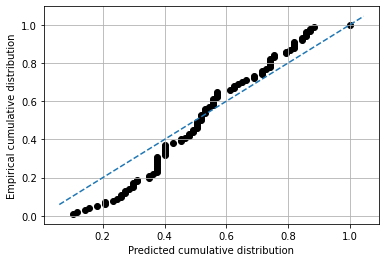

End2end test calibration error when step size is 0.001:  7.75289517625232
End2end test calibration error when step size is 0.01:  0.7651669758812617
End2end test calibration error when step size is 0.1:  0.07199359082475965


In [5]:
mean_pred, var_pred = cal_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 20%|████████▌                                  | 2/10 [00:00<00:00, 12.38it/s]

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.15it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.91it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           2.018
  RMSE          4.160
  MDAE          0.353
  MARPD         29.083
  R2            0.942
  Correlation   0.980
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.166
  Mean-absolute Calibration Error       0.152
  Miscalibration Area                   0.153
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.289
     Group Size: 0.56 -- Calibration Error: 0.200
     Group Size: 1.00 -- Calibration Error: 0.152
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.347
     Group Size: 0.56 -- Calibration Error: 0.216
     Group Size: 1.00 -- Calibration Error: 0.166
===============

Lims is None. Setting lims now:
min_max_true: (0.08, 62.42)
min_max_pred: (-0.08791256, 48.26788)
lims: (-0.08791256, 62.42)
lims_ext: (-6.3387037277221685, 68.6707893371582)


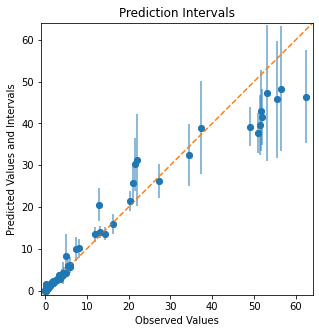

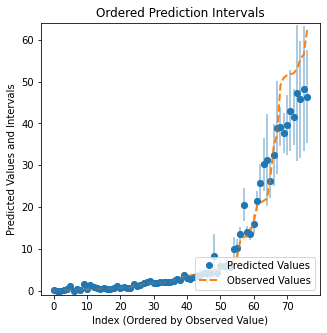

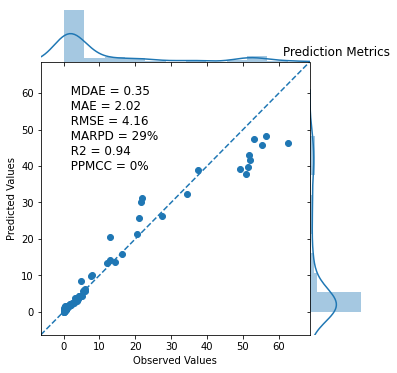

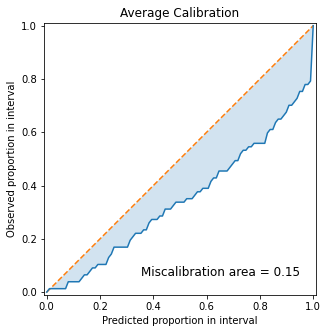

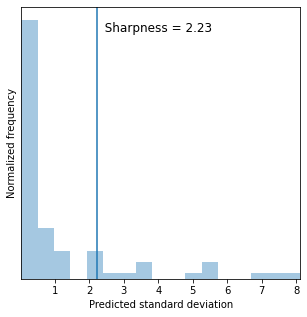

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))